In [1]:

import math
from statistics import mean

import matplotlib.pyplot as plt
import pandas as pd
from hurst import compute_Hc
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
from src.cointegration.linear_regression import regresion_ols
from src.cointegration.functions import ad_fuller,pairwise_engle_granger_coint,ad_fuller_to_df

# This is a sample Python script.
from datetime import datetime
import time
import pf as pf
import statsmodels.api as sm

from src.pairs import *
import yfinance as yf

from src.pairs.pairs_strategy import *
from src.util.DataFetcher import *


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def normalize_start_1(prices):
      return prices/prices.iloc[0]

In [3]:
tickers = ["BTC-USD", "ETH-USD"]

start_date = datetime(2018, 1, 4)
end_date = datetime(2019, 1, 4) #2019-01-04
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
tickData = tickData.dropna()

tickData = normalize_start_1(tickData)



print(tickData.shape)
# Most Recent Data
tickData.head()
Y = tickData['BTC-USD']
X = tickData['ETH-USD']
print('linear regression OLS lookback window')
regression = regresion_ols(Y,X)
regression.fit()

print('beta', regression.beta, 'c', regression.c)

# regression_model,regression_ln_df,residuals = linear_regression(Y, X)
# c = regression_model.params.iloc[0]
# beta = regression_model.params.iloc[1]
# residuals = residuals



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(365, 2)
linear regression OLS lookback window
Beta 0.45461808092984346 Constant 0.25844536614877045
beta 0.45461808092984346 c 0.25844536614877045



/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = self.model.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta = self.model.params[1]


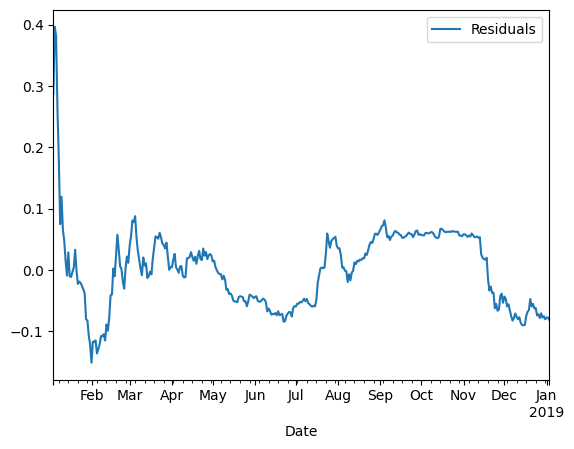

In [6]:
regression.residuals.plot()
res = regression.resid()
res.plot()
# tickData.plot()
#manufacture our TEST residuals from model when going forwards (NOT on TRAINING set) - should be same residuals
# this should be a unit test

# predicted_y = regression.predict(X)
# Calculating residuals
# test['Residual'] = test['Asset_Y'] - test['Predicted_Y'


In [5]:
# predicted_y.plot()
# Y.plot()
# Y.plot()

# res_pred = Y - predicted_y
# # res_pred.plot()
# regression.residuals.head()

In [1]:
resid_test = regression.predict_residuals(X,Y)
resid_test.plot()
regression.residuals.plot()


# residuals.head()
# print(res_pred.to_xarray == residuals.to_xarray)
# res_pred.head()

NameError: name 'regression' is not defined

<Axes: xlabel='Date'>

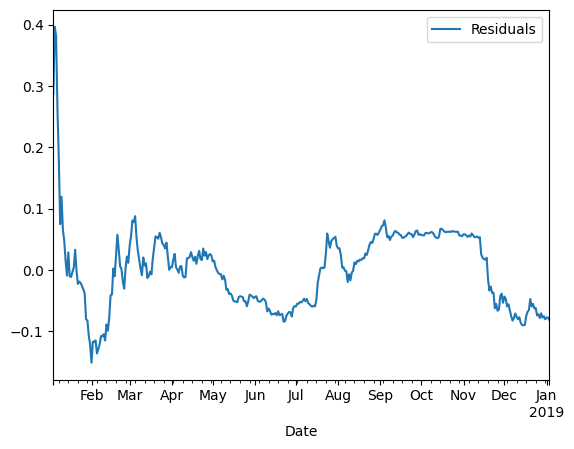

In [13]:
resid_test = regression.predict_residuals(X,Y)
# resid_test.plot()
regression.residuals.plot()

<Axes: xlabel='Date'>

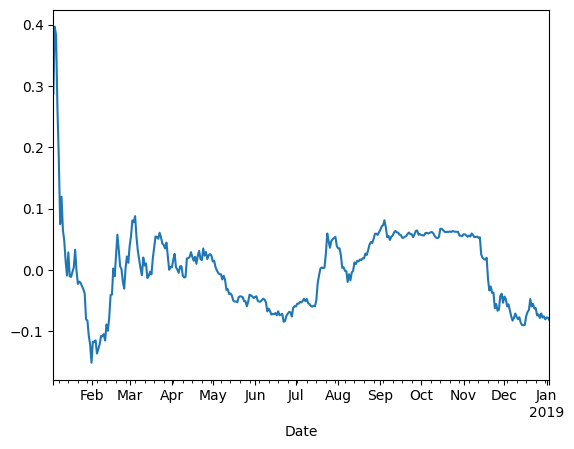

In [12]:
resid_test.plot()
